### 다항 회귀와 과대적합/과소적합 이해

#### 다항 회귀

- 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라고 함

- 다항 회귀도 선형 회귀

- 회귀에서 선형/비선형을 나누는 기준은 독립변수의 선형/비선형 여부가 아니라 '회귀계수'의 선형/비선형 여부이다

- 사이킷런에서는 다항 회귀를 위한 클래스를 따로 제공하지 않기 때문에 비선형 함수를 선형 모델에 적용시키는 방법으로 구현함 >> PolynomialFeatures 이용

2차

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처: \n', X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures 이용
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차

In [2]:
#3차 다항 회귀 함수 임의로 설정
def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [5]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('변환된 3차 다항식 계수 피처: \n', poly_ftr)

#LinearRegression에 3차 다항식 계수 피처와 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

변환된 3차 다항식 계수 피처: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


3차 다항식 Poltnomial 변환 이후에는 다항식 계수 피처가 10개로 늘어난다

#### 피처 변환과 선형 회귀 적용을 따로 하는 것보다는 사이킷런의 Pipeline 객체를 이용하여 한 번에 다항 회귀를 구현할 수 있다

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

#Pipeline으로 Streamline하게 Polynomial Feature 변환과 LinearRegression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수:\n', np.round(model.named_steps['linear'].coef_, 2))  #pipeline을 구성하는 세부 객체에 접근하는 named_steps

Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항 회귀의 차수(degree)를 높일수록 학습데이터에만 너무 맞춘 학습이 이루어져 과적합의 문제가 발생한다

데이터셋의 피처 X와 타겟 y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어주고

이에 기반하여 다항 회귀 차수를 변화시키면서 회귀 예측 곡선과 정확도를 비교해보자


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.41입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]입니다.
Degree 15 MSE는 181238256.56입니다.


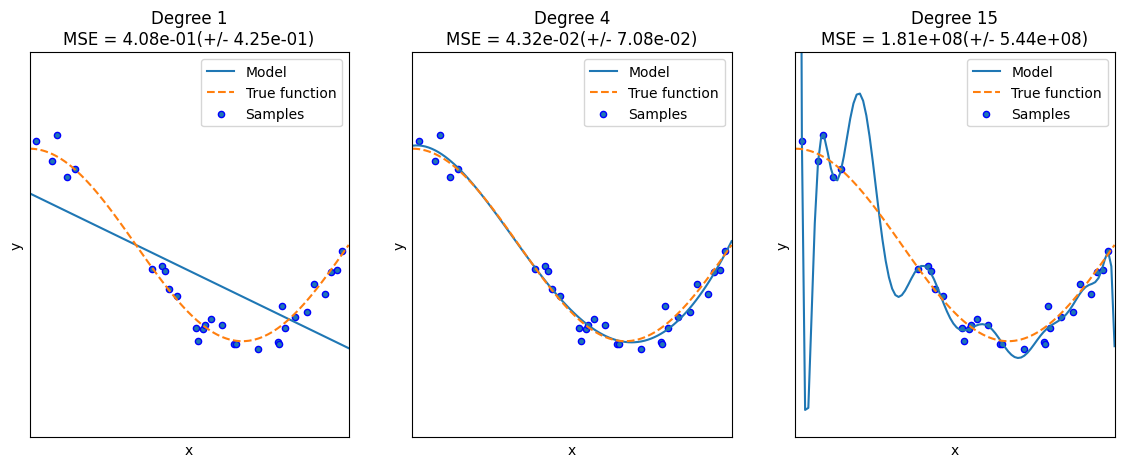

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#임의의 값으로 구성된 X값에 대해 코사인 변환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

#X는 0부터 1부터 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반 trie_fun에서 약간의 노이즈 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

#다항 회귀 계수를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  #개별 degree별로 polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  #교차 검증으로 다항 회귀 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)

  #named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], np.round(-1*np.mean(scores), 2)))

  #0부터 1까지 테스트 데이터셋을 100개로 나눠 예측 수행
  #예측 수행 후 예측 곡선과 실제 곡선 그려서 비교
  X_test = np.linspace(0, 1, 100)
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')  #예측값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')  #실제값 곡선
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 실선은 다항 회귀 예측 곡선

- 점선은 실제 데이터셋 X, Y의 코사인 곡선

1. 첫 번째 그래프는 차수가 1인 예측 곡선, 단순한 직선으로서 실제 데이터셋을 예측하기엔 너무 단순함 >> 과소적합 모델

2. 두 번째 그래프는 차수가 4인 예측 곡선, 실제 데이터셋과 유사한 모습. 학습데이터를 비교적 잘 반영하여 테스트 데이터를 잘 예측한 모델이 됨. MSE=0.04로 가장 뛰어난 성능을 보임

3. 세 번째 그래프는 차수가 15인 예측 곡선, 예측 곡선이 학습데이터셋만 정확히 예측하고 테스트 데이터와는 완전히 다른 형태가 만들어짐. 과적합이 심한 모델이 됨

#### 편향-분산 트레이드오프

- 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다

- 편항이 높으면 분산이 낮아짐 >> 과소적합

- 편향이 낮으면 분산이 높아짐 >> 과대적합

- 전체 오류가 가장 낮아지는 '골디락스' 지점